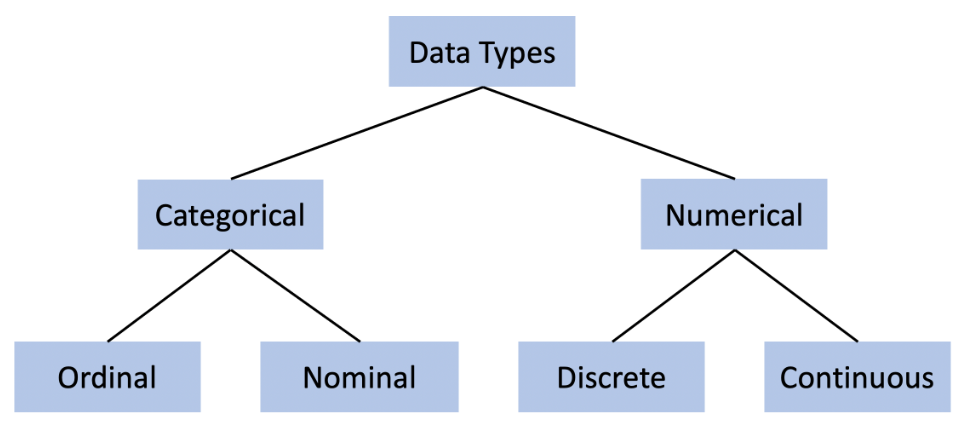

#### Feature engineering is a crucial step in preparing data for machine learning models, where raw features are transformed to improve model performance and accuracy.
#### They make sure that features with different ranges or units are transformed into a comparable scale so that models can learn effectively.
#### 1) Scaling adjusts the range of features without changing their distribution.
#### 2) Normalization brings values into a fixed range, usually [0,1].
#### 3) Standardization centers data around the mean with unit variance.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#print(sns.get_dataset_names())

data = sns.load_dataset("car_crashes")
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [3]:
df = data.select_dtypes(include=np.number)
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total,51.0,15.790196,4.122002,5.900,12.7500,15.600,18.500,23.900
speeding,51.0,4.998196,2.017747,1.792,3.7665,4.608,6.439,9.450
alcohol,51.0,4.886784,1.729133,1.593,3.8940,4.554,5.604,10.038
not_distracted,51.0,13.573176,4.508977,1.760,10.4780,13.857,16.140,23.661
no_previous,51.0,14.004882,3.764672,5.900,11.3480,13.775,16.755,21.280
ins_premium,51.0,886.957647,178.296285,641.960,768.4300,858.970,1007.945,1301.520
ins_losses,51.0,134.493137,24.835922,82.750,114.6450,136.050,151.870,194.780


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [7]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')

In [ ]:
#Normal/Generalised Scaling
#Absolute Maximum Scaling rescales each feature by dividing all values by the maximum absolute value of that feature.
#1) Scales values between -1 and 1.
#2) Sensitive to outliers, making it less suitable for noisy datasets.
data.total.max()
data.speeding.max()

9.45

In [8]:
max_abs = np.max(np.abs(df), axis=0)

scaled_df = df / max_abs

scaled_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,0.786611,0.775873,0.561865,0.762774,0.706767,0.602795,0.744840
1,0.757322,0.785291,0.450787,0.688475,0.799530,0.809423,0.687596
2,0.778243,0.688889,0.518828,0.660327,0.839098,0.691092,0.566537
3,0.937238,0.426667,0.580195,0.889903,1.000000,0.635672,0.731030
4,0.502092,0.444444,0.334728,0.461519,0.501880,0.674911,0.850344


In [ ]:
#Standard Scaling
"""StandardScaler from scikit-learn's preprocessing module is a widely
used tool for standardizing features in a dataset, and it integrates seamlessly with Pandas DataFrames."""

"""Standardization, often referred to as Z-score normalization or standard scaling, transforms features in a
 dataset to have a mean of 0 and a standard deviation of 1. This is achieved by applying the Z-score formula to each data point"""

  **Z Score= (x- mean) / std**

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss=StandardScaler()

In [11]:
df_ss = ss.fit_transform(df[['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses']])

In [12]:
df_ss

array([[ 0.73744574,  1.1681476 ,  0.43993758,  1.00230055,  0.27769155,
        -0.58008306,  0.4305138 ],
       [ 0.56593556,  1.2126951 , -0.21131068,  0.60853209,  0.80725756,
         0.94325764, -0.02289992],
       [ 0.68844283,  0.75670887,  0.18761539,  0.45935701,  1.03314134,
         0.0708756 , -0.98177845],
       [ 1.61949811, -0.48361373,  0.54740815,  1.67605228,  1.95169961,
        -0.33770122,  0.32112519],
       [-0.92865317, -0.39952407, -0.8917629 , -0.594276  , -0.89196792,
        -0.04841772,  1.26617765],
       [-0.5366299 ,  0.01692   , -0.63009543, -0.63369765, -0.29104195,
        -0.2914793 ,  0.22027622],
       [-1.22267063, -0.01511416, -0.5833691 , -0.9356316 , -1.38129335,
         1.02964051,  1.32270187],
       [ 0.10040792,  0.57951992, -0.01564416,  0.1166575 ,  0.54542553,
         1.42128062,  0.6907692 ],
       [-2.42324191, -1.49769509, -1.92383077, -1.71868879, -2.17430102,
         2.19175919,  0.06330968],
       [ 0.51693265, -0.6202

In [13]:
pd.DataFrame(df_ss,columns=['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous','ins_premium', 'ins_losses'])

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
1,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
2,0.688443,0.756709,0.187615,0.459357,1.033141,0.070876,-0.981778
3,1.619498,-0.483614,0.547408,1.676052,1.951700,-0.337701,0.321125
4,-0.928653,-0.399524,-0.891763,-0.594276,-0.891968,-0.048418,1.266178
5,-0.536630,0.016920,-0.630095,-0.633698,-0.291042,-0.291479,0.220276
6,-1.222671,-0.015114,-0.583369,-0.935632,-1.381293,1.029641,1.322702
7,0.100408,0.579520,-0.015644,0.116657,0.545426,1.421281,0.690769
8,-2.423242,-1.497695,-1.923831,-1.718689,-2.174301,2.191759,0.063310
9,0.516933,-0.620259,0.177686,0.648402,0.756823,1.547371,0.393915


#### Min-Max Scaling transforms features by subtracting the minimum value and dividing by the difference between the maximum and minimum values.
#### This method maps feature values to a specified range, commonly 0 to 1.
#### Sensitive to outliers because min and max can be skewed.

#### Normalization= X - Min /Max-Min

In [14]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [15]:
df_mms = mms.fit_transform(df[['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses']])

In [16]:
pd.DataFrame(df_mms,columns=['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous','ins_premium', 'ins_losses'])

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,0.716667,0.723426,0.479218,0.743710,0.594278,0.216190,0.556369
1,0.677778,0.735048,0.347188,0.663440,0.722627,0.623931,0.456842
2,0.705556,0.616088,0.428064,0.633030,0.777373,0.390427,0.246363
3,0.916667,0.292505,0.501007,0.881056,1.000000,0.281066,0.532357
4,0.338889,0.314442,0.209236,0.418246,0.310793,0.358497,0.739802
5,0.427778,0.423087,0.262285,0.410210,0.456437,0.293438,0.510220
6,0.272222,0.414730,0.271758,0.348660,0.192198,0.647053,0.752209
7,0.572222,0.569862,0.386856,0.563171,0.659168,0.751880,0.613496
8,0.000000,0.027945,0.000000,0.189032,0.000000,0.958108,0.475765
9,0.666667,0.256856,0.426051,0.671568,0.710403,0.785630,0.548335


####Normalization (Vector Normalization)
#### adjusting the vector's length to 1 without altering its direction. (useful in NLP)
####specifically refers to scaling individual vectors (rows or columns, treated as vectors) to a unit norm (e.g., L1 or L2 norm(euclidean distance))

In [17]:
from sklearn.preprocessing import Normalizer

In [18]:
norm = Normalizer()

In [19]:
norm_df = norm.fit_transform(df)
scaled_df = pd.DataFrame(norm_df, columns=df.columns)
scaled_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,0.023545,0.009183,0.007063,0.022603,0.018836,0.982564,0.181697
1,0.017037,0.006985,0.004259,0.015333,0.016015,0.991594,0.126062
2,0.020513,0.007179,0.005744,0.017231,0.019692,0.991968,0.121698
3,0.026655,0.004798,0.006930,0.025056,0.025322,0.984500,0.169438
4,0.013421,0.004697,0.003758,0.012213,0.011945,0.982434,0.185244


#### Robust Scaling uses the median and interquartile range (IQR) instead of the mean and standard deviation making the transformation robust to outliers and skewed distributions.
#### It is highly suitable when the dataset contains extreme values or noise.
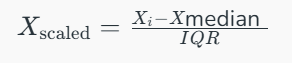

In [20]:
#Robust Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
scaled_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,0.556522,1.019270,0.635088,0.740198,0.233956,-0.310711,0.242579
1,0.434783,1.052572,-0.016959,0.429707,0.599038,0.812099,-0.056951
2,0.521739,0.711693,0.382456,0.312081,0.754762,0.169092,-0.690396
3,1.182609,-0.215529,0.742690,1.271459,1.388016,-0.132059,0.170316
4,-0.626087,-0.152666,-0.698246,-0.518721,-0.572406,0.081164,0.794627
